In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df_2022 = pd.read_csv('../input/kaggle-survey-2022/kaggle_survey_2022_responses.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (0,208,225,255,257,260,270,271,277) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Introduction
Like many technicial fields, the field of Data is greatly male dominated. This characteristic of the entire data industry is not a surprise to many and have lead to countless initiatives on what can be done to close the gap. While this is an important matter, true progress would not be fully obtainable without fully understanding the field as it currently stands for women in the field and women entering the field. The goal of this notebook is to uncover unique themes among these two women groups.

# Section 1: Women Entering the Field
Let's begin by examing the women group as one. What are their current roles? 

In [3]:
# subset the data to woman only
df_2022_women = df_2022[df_2022['Q3']=='Woman']

## Section 1.1: Roles held by Women 

Text(0.5, 1.0, 'Q23: Select the title most similar to your current role (or most recent title if retired)')

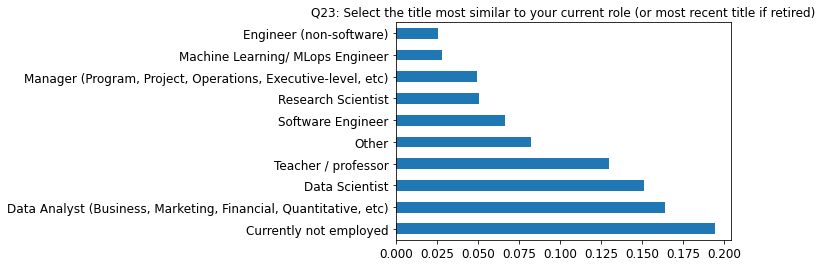

In [4]:
# distribution of roles
df_2022_women['Q23'].value_counts(normalize=True)[:10].plot(kind='barh',fontsize=12)
plt.title('Q23: Select the title most similar to your current role (or most recent title if retired)')

 **"Currently not employed"** is the highest designation from female survey responents. The value count is normalized, which means that about 1 out of every 5 female respondents self identified as unemployed. 

 This could be due to multiple factors but since Question 23 was only asked if the response to Question 5 was **"No"**, it can be adequately deducted that **"Currently not employed"** indicates that individual is taking informal education while not holding a job at the time of responding. Let's investigate this by comparing the "Currently not employed" group's education level (Question 8) and current experience with coding (Question 11).
 
 The second most common role is that of a Data Analyst, followed closely by Data Scientist.

## Section 1.2: Why is the largest role designation from female respondents, "Currently unemployed"?

In [5]:
# subset to not employed women group 
women_not_employed= df_2022_women[df_2022_women['Q23']=='Currently not employed']

In [6]:
print('The percentage of women who are unemployed at time of survey :', str(round(len(women_not_employed)/len(df_2022_women)*100,2)) +'%')

The percentage of women who are unemployed at time of survey : 7.49%


7.49% may not seem like a enormous percentage, but it's key to understand how the survery was conducted. 7.49% is the percentage we obtain from dividing by the entire number of female respondents, which included students. Students were not asked question Q23, so a more accurate percentage can be obtain by dividing the total female respondents minus those are students.

In [7]:
# subset the data to female students only
students = df_2022_women[df_2022_women['Q5']=='Yes']
not_students = len(df_2022_women) - len(students)
print('The actual percentage of women who are unemployed at time of survey :', str(round(len(women_not_employed)/not_students*100,2)) +'%')

The actual percentage of women who are unemployed at time of survey : 16.79%


In [8]:
# All unemployed women are currently not university students
print(women_not_employed['Q5'].value_counts())
total_unemployed = len(women_not_employed)
print(total_unemployed)

No    396
Name: Q5, dtype: int64
396


Text(0.5, 1.0, 'Q11: For how many years have you been writing code and/or programming?')

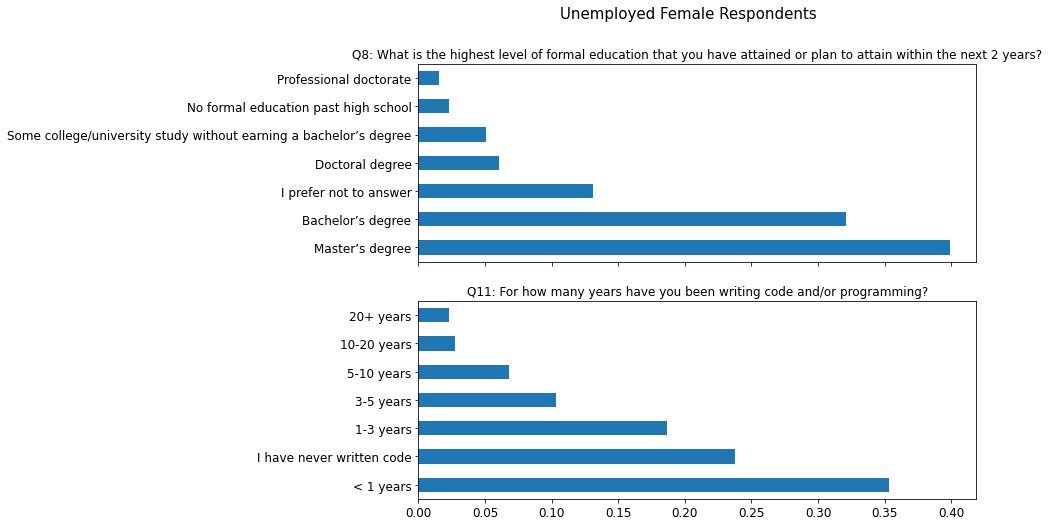

In [9]:
plt.subplots(2, 1, figsize=(10, 8), sharex=True)
plt.suptitle('Unemployed Female Respondents',fontsize=15)

# Top Plot: what degrees do they have or plan to attain
plt.subplot(2, 1, 1)
women_not_employed['Q8'].value_counts(normalize =True).plot(kind='barh', fontsize=12)
plt.title('Q8: What is the highest level of formal education that you have attained or plan to attain within the next 2 years?')

# Bottom Plot: How many years of coding experience do they have?
plt.subplot(2, 1, 2)
women_not_employed['Q11'].value_counts(normalize=True).plot(kind='barh', fontsize=12)
plt.title('Q11: For how many years have you been writing code and/or programming?')

#### Note - X axis is shared
From both plots, we now know that Female respondents who are currently not employed are (1) highly educated with most having Master's or Bachelor's degree and (2) are relatively new to coding with most responded having less that 1 year of coding experience or no coding experience at all. Let's now combine these two plots to see if these initial observations are further supported.

Text(0.5, 1.0, 'Coding Experience by Degree Type')

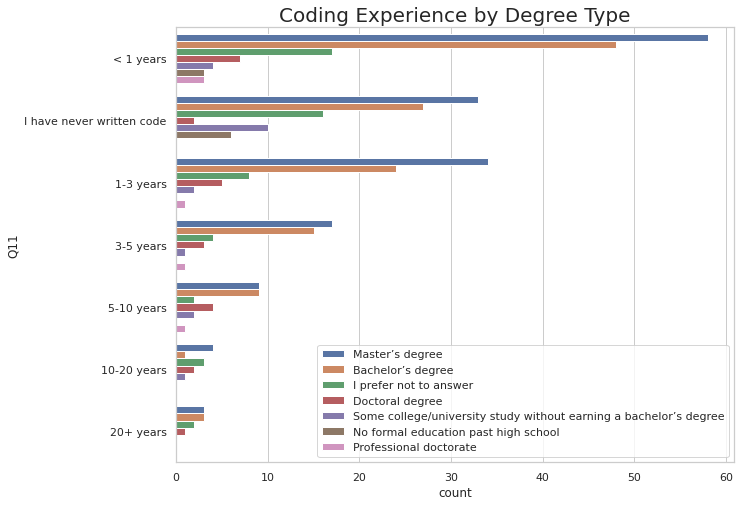

In [10]:
plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")
sns.countplot(data=women_not_employed, 
              y='Q11', 
              order=women_not_employed['Q11'].value_counts().index,
              hue='Q8', 
              hue_order=women_not_employed['Q8'].value_counts(ascending=False).index)
plt.legend(ncol=1, loc="lower right", frameon=True)
plt.title('Coding Experience by Degree Type', fontsize=20)

For each group of unemployed female respondents sectioned by coding experience, the largest subgroup is female respondents with a Master's degree, followed by female respondents with a Bachelor's degree. This is a likely indication that a significant proportion of women entering the Data Industry are doing so by taking a career break to either (1) purse higher formal education despite the high monetary cost of a graduate degree or (2) switch to a data role through non-unversity learning despite the opportunity cost of lost salary or (3) both. Q6 will provide a more concrete conclusion since it ask for platforms (including "university courses") used to complete data science courses.

## Section 1.3: What tools are this group using to  learn and practice Data Science if they are not in school?

In [11]:
Q6 = ['Q6_1','Q6_2','Q6_3','Q6_4','Q6_5','Q6_6','Q6_7','Q6_8','Q6_9','Q6_10','Q6_11', 'Q6_12']

for q in Q6:
    print(women_not_employed[q].value_counts().index)

Index(['Coursera'], dtype='object')
Index(['edX'], dtype='object')
Index(['Kaggle Learn Courses'], dtype='object')
Index(['DataCamp'], dtype='object')
Index(['Fast.ai'], dtype='object')
Index(['Udacity'], dtype='object')
Index(['Udemy'], dtype='object')
Index(['LinkedIn Learning'], dtype='object')
Index(['Cloud-certification programs (direct from AWS, Azure, GCP, or similar)'], dtype='object')
Index(['University Courses (resulting in a university degree)'], dtype='object')
Index(['None'], dtype='object')
Index(['Other'], dtype='object')


In [12]:
# calculate the count for each platform
Q6_Q8_table = pd.pivot_table(women_not_employed, values=Q6, columns='Q8', aggfunc= 'count')
Q6_Q8_table

Q8,Bachelor’s degree,Doctoral degree,I prefer not to answer,Master’s degree,No formal education past high school,Professional doctorate,Some college/university study without earning a bachelor’s degree
Q6_1,57,10,10,61,2,1,11
Q6_10,15,6,4,29,0,2,0
Q6_11,16,2,6,12,3,1,3
Q6_12,41,7,28,65,3,1,4
Q6_2,10,2,0,11,0,1,2
Q6_3,29,3,1,43,2,1,4
Q6_4,22,4,5,21,1,2,4
Q6_5,6,1,0,0,0,0,0
Q6_6,7,3,3,7,1,1,1
Q6_7,23,6,6,30,1,2,4


Text(0.5, 1.0, 'Learning Platforms by Degree Type for Unemployed Women')

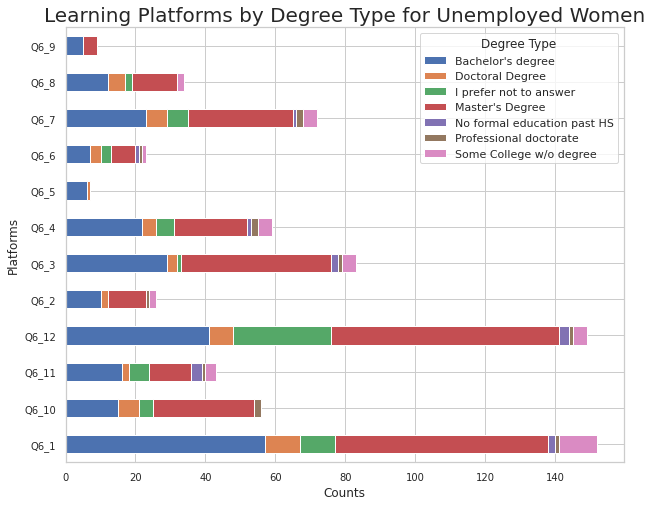

In [13]:
Q6_Q8_table.plot(kind='barh',
                   figsize=(10,8),
                   fontsize= 10,
                   stacked=True)
plt.xlabel('Counts')
plt.ylabel('Platforms')
plt.legend(["Bachelor's degree", 'Doctoral Degree', 'I prefer not to answer', "Master's Degree", 'No formal education past HS', 
         'Professional doctorate', 'Some College w/o degree'], ncol=1, loc="upper right",title='Degree Type', frameon=True)
plt.title('Learning Platforms by Degree Type for Unemployed Women', fontsize=20)

For most unemployed female respondents not in school, they are are pursuing data science through online platforms. The most widely used is **Coursera**, **Kaggle**, and a many more that the survey collectively titled as **Other**. This plot supports the two plots above; most unemployed women seem to have **initially** chosen non-unversity learning as means of learning data science. 

## Section 1.4 Comparing the Unemployed group to Female Student Group 

 From the supplementary data files, we know that Q5 asked for "**Are you currently a student? (high school, university, or graduate)**". An "Yes" corresponds to being a student and an "No" to not being a student

The reasons for comparing these groups are twofolds. Firstly, both groups represent two distinct groups of females entering the Data Science Industry, which allows us to uncover if there is a bias towards having formal university education and if that degree of bias is greater for women than it is for men. This survery data does only contains salary information for men and women currently employed in the data industry so we would not be able to investigate this. But a close proxy is to look at salary information for those with less than 2 years of coding experience (Q11) and groupby those who have a degree and those that don't. 

The second reason for comparing these groups is because female students represent women who have already absorbed the cost of attending university and thus comparing this group to the unemployed group can perhaps reveal additional barriers to entry besides cost of formal education. 

In [14]:
# what % of women are students or unemployed
print('The percentage of women who are students at time of survey :', str(round(len(students)/len(df_2022_women)*100,2)) +'%')
print('Total percentage of female respondents who are students or unemployed:', str(round((len(students)+len(women_not_employed))/len(df_2022_women)*100,2)) +'%')

The percentage of women who are students at time of survey : 55.37%
Total percentage of female respondents who are students or unemployed: 62.86%


Over half of female respondents are students. This is a strong indicator that there are more women entering the field than there are women currently in the field. Likewise if we also add on the percentage of unemployed women, that percentage of women looking to break into Data Science is even higher, almost 2/3 of all female respondents.

Text(0.5, 1.0, 'Q8: Degrees female students are in school for')

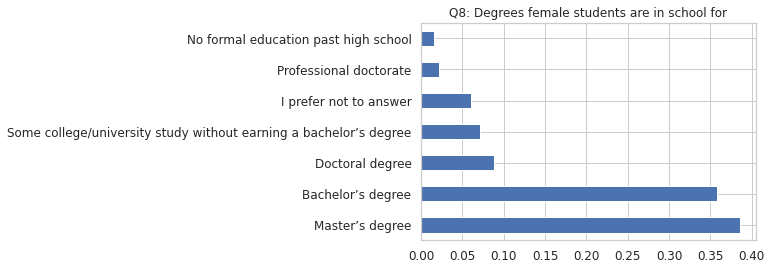

In [15]:
# what degrees are female students pursuing
students['Q8'].value_counts(normalize='True').plot(kind='barh', fontsize=12)
plt.title('Q8: Degrees female students are in school for')

Most female students are either pursuing a Master's or Bachelor's degree in Data Science. The proportion of female students getting their Masters in Data Sciences is higher than that of female students getting their Bachelors. This illustrastes definitely that of the women entering the field, majority are doing so by going to graduate school.

# Section 2: Women currently in the Field

In [16]:
# union students and not employed dataframe 
student_or_unemployed = pd.concat([women_not_employed, students])

# anti-join to return women who are not students or employed 
outer = df_2022_women.merge(student_or_unemployed, how='outer', indicator=True)
employed_women = outer[(outer._merge=='left_only')].drop('_merge', axis=1)

In [17]:
employed_women.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
2,260,35-39,Woman,India,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,772,60-69,Woman,Argentina,No,Coursera,edX,NaN,NaN,NaN,...,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
4,369,22-24,Woman,Canada,No,NaN,NaN,NaN,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,150,35-39,Woman,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,168,55-59,Woman,United States of America,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [18]:
print('Total percentage of female respondents who are employed:', str(round(len(employed_women)/len(df_2022_women)*100,2)) +'%')

Total percentage of female respondents who are employed: 37.14%


 The survey contains more information about employed individuals in the Data Science and related fields than for students and those unemployed. For the employed women group or women already in the field, the variables of interest are age, current role, and salary.

## Section 2.1: What is the distribution of age for currently employed women?

Text(0.5, 1.0, 'Employed Women Age Distribution')

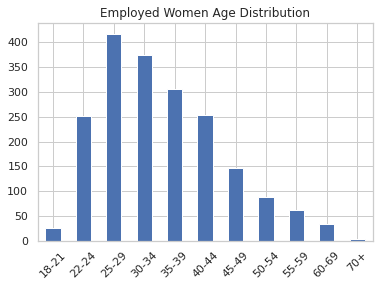

In [19]:
employed_women['Q2'].value_counts().reindex(['18-21',
                                             '22-24',
                                             '25-29',
                                             '30-34',
                                             '35-39', 
                                             '40-44', 
                                             '45-49',
                                             '50-54',
                                             '55-59',
                                             '60-69',
                                             '70+']).plot(kind='bar', rot=45)
plt.title('Employed Women Age Distribution')

Most employed women are between the ages 18-30. As age increases, the number of women in the field increases drastically until age 30, where the number begins to decline. This pattern coupled early observations paints a fairly clear story of career progression: many females enter the field but few remain in field past a decade. This pattern can also shreds light on another challenge: career mobility for women in this field. 

Oftentimes, as employees, we feel more supported by our employers if there are resources in place to help us properly perform our jobs and grow professionally. Question 26, **"Approximately how many individuals are responsible for data science workloads at your place of business?"**, is a proxy for this. This and question Q25, **"What is the size of the company where you are employed?"** are the closest measures that we have for supportiveness from the survey. The assumption here is that larger companies tend to have more well defined paths for internal mobility and promotion.

In [20]:
# calculate the count of each team size for each company size 
Q25_Q26_table = pd.pivot_table(employed_women, 
                               index='Q25', 
                               columns='Q26', 
                               values='Q29', 
                               aggfunc= 'count')[['0','1-2', '3-4', '5-9','10-14', '15-19', '20+']].reindex(['10,000 or more employees', 
                                                                                                             '1000-9,999 employees', 
                                                                                                             '250-999 employees', 
                                                                                                             '50-249 employees',
                                                                                                             '0-49 employees'])
Q25_Q26_table

Q26,0,1-2,3-4,5-9,10-14,15-19,20+
Q25,,,,,,,
"10,000 or more employees",41,24,24,28,18,13,169
"1000-9,999 employees",39,28,36,27,29,19,93
250-999 employees,28,26,35,47,26,12,42
50-249 employees,54,69,61,47,16,4,17
0-49 employees,104,108,51,28,10,2,7


Text(30.499999999999993, 0.5, 'Company Size')

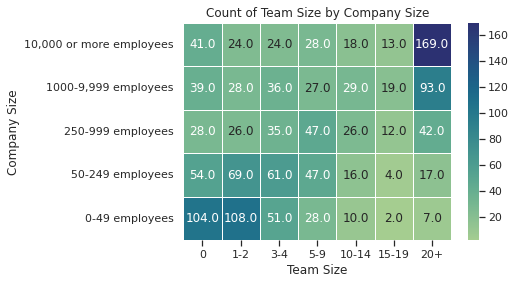

In [21]:
# plot as heatmap to highlight the top counts
sns.heatmap(Q25_Q26_table, annot=True, linewidth=.5,fmt=".1f", cmap="crest").xaxis.tick_bottom()
plt.title('Count of Team Size by Company Size')
plt.xlabel('Team Size')
plt.ylabel('Company Size')

 Most employed women are currently employed by companies with employee count of 999 employees or less and work amongst team sizes of 9 or smaller. For companies that have less than 249 employees, an overwhelming number of women work in team sizes of 4 or less. These smaller companies often do not have well developed data teams and have limited resources. Smaller companies also often require their Data Scientist to do it all with little menorship/guidance in place. It is not until we reach companies with 10,000 or more employees that we see a shift to more women working among teams of 20 or more. 

## Section 2.2: Can a female expect a high salary in Data Science?

Data Science is a well compensated career, with a median salary of over 6 figures in the US. Here, we examine if that remains consistent for women practioners in the field. Since the data contains salary data from female data scientists from around the world, we will further subset the **employed_women** dataset to women living in the US to make an accurate and fair conclusion about salary data.

In [22]:
# subset to just Females in the US
women_employed_us = employed_women[employed_women['Q4'] == 'United States of America']
women_employed_us.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
12,168,55-59,Woman,United States of America,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
27,143,30-34,Woman,United States of America,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,532,40-44,Woman,United States of America,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Slack Communities (ods.ai, kagglenoobs, etc)",NaN,NaN
64,344,45-49,Woman,United States of America,No,NaN,NaN,NaN,DataCamp,NaN,...,"Reddit (r/machinelearning, etc)","Kaggle (notebooks, forums, etc)",NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
88,444,40-44,Woman,United States of America,No,Coursera,NaN,NaN,DataCamp,NaN,...,"Reddit (r/machinelearning, etc)","Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


In [23]:
# salary ranges defined by the survery
ranges = ['$0-999',
          '1000-1,999',
          '2000-2,999', 
          '4000-4,999', 
          '5000-7,499',
          '7,500-9,999',
          '10,000-14,999', 
          '15,000-19,999', 
          '20,000-24,999',
          '25,000-29,999', 
          '30,000-39,999', 
          '40,000-49,999',
          '50,000-59,999',
          '60,000-69,999',
          '70,000-79,999',
          '80,000-89,999',
          '90,000-99,999',
          '100,000-124,999', 
          '125,000-149,999',
          '150,000-199,999', 
          '200,000-249,999', 
          '250,000-299,999', 
          '300,000-499,999', 
          '$500,000-999,999',
          '>$1,000,000']

Text(0, 0.5, 'Counts')

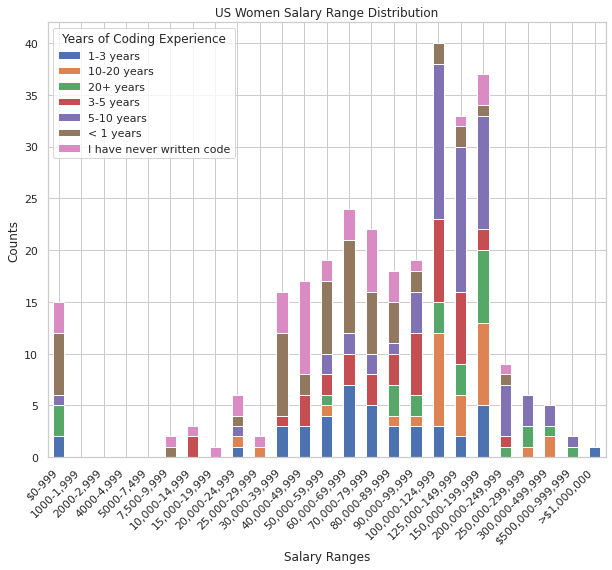

In [24]:
# stacked bar plot of salary ranges by coding experience
women_employed_us.pivot_table(columns='Q11',values='Q4',index='Q29', 
                               aggfunc='count').reindex(ranges).plot.bar(figsize=(10,8),
                                                     stacked=True, 
                                                     legend=True)
plt.legend(title="Years of Coding Experience")
plt.title('US Women Salary Range Distribution')
plt.xticks( rotation = 45, ha="right")
plt.xlabel('Salary Ranges')
plt.ylabel('Counts')

Most US female data workers earn a high salary. The mode of salary is the 100,000-124,999 range. The graph is normalized, so about 13 out of every 100 women in the field make between `$100,000` and `$124,999`. However the mean salary for US women data workers appears to be lower than the mode. The common factors that impact this are years of experience (which we can see from this stacked bar plot), degree, and age. But what about company size? Is there substantial reason to believe larger companies will pay higher salaries.

In [25]:
Q25_Q29_table = pd.pivot_table(women_employed_us, 
                               index='Q29', 
                               values='Q2',
                               columns='Q25', 
                               aggfunc= 'count')[['0-49 employees','50-249 employees',
                                                  '250-999 employees','1000-9,999 employees', 
                                                  '10,000 or more employees']].reindex(ranges).fillna(0)
Q25_Q29_table

Q25,0-49 employees,50-249 employees,250-999 employees,"1000-9,999 employees","10,000 or more employees"
Q29,,,,,
$0-999,8.0,2.0,2.0,2.0,1.0
"1000-1,999",0.0,0.0,0.0,0.0,0.0
"2000-2,999",0.0,0.0,0.0,0.0,0.0
"4000-4,999",0.0,0.0,0.0,0.0,0.0
"5000-7,499",0.0,0.0,0.0,0.0,0.0
"7,500-9,999",1.0,0.0,1.0,0.0,0.0
"10,000-14,999",0.0,1.0,1.0,1.0,0.0
"15,000-19,999",0.0,0.0,0.0,1.0,0.0
"20,000-24,999",4.0,1.0,0.0,0.0,1.0


Text(66.5, 0.5, 'Salary Ranges')

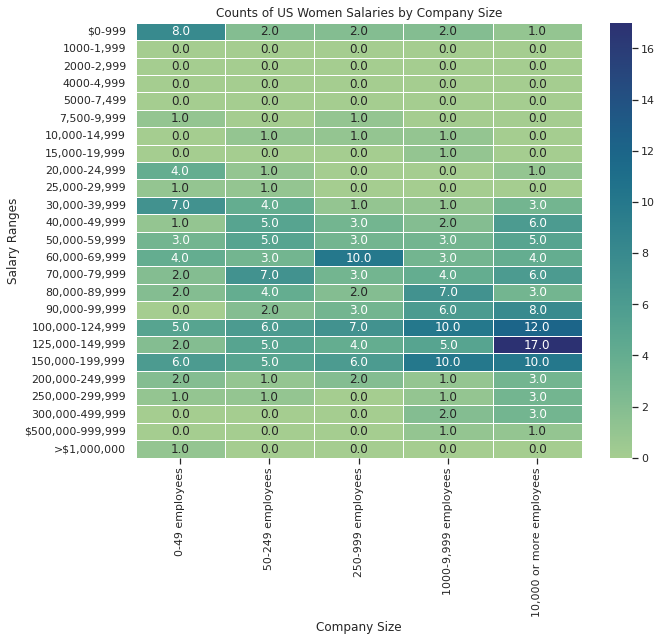

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(Q25_Q29_table, annot=True, linewidth=.5,fmt=".1f", cmap="crest").xaxis.tick_bottom()
plt.title('Counts of US Women Salaries by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary Ranges')


In [27]:
# US women with less than 6 figures 
print(1-(len(women_employed_us[women_employed_us['Q29'].isin(['100,000-124,999', '125,000-149,999',
                                                           '150,000-199,999', '200,000-249,999', 
                                                           '250,000-299,999', '300,000-499,999', 
                                                           '$500,000-999,999', '>$1,000,000'])])/len(women_employed_us)))

0.6607142857142857


Most US female data workers with 6 figure salaries work for large companies (employee count of 1,000 or more). The other fact to note is that even thought the mean salary for US women is high, not all women are earning 6 figures. In fact, the distribution of salaries is fairly uniform for salaries under 99,999 and greater than 50,000. 

Additionally around 66% of US females data workers responded making less than 6 figures. This means that companies despite size are paying between 50,000 and 99,999 if not paying 6 figures for their US female data workers. Salary is closely linked to years of experience and job function, and considering that the most common role held by female respondents is the position of a "Data Analyst", this observation is not too jarring. 

## Summary 
- Women Entering the Field:
    - Consists of two distinct groups: students and umemployed women
    - Students make up the majority of women entering the Field and the majority of female respondents in general (55.4% of female respondents are students)
    - Most Students are women pursuing their Masters in Data Science
    - Unemployed women included women who plan to start a graduate degree and those who are using online platforms such as Cousera and Kaggle to self learn Data Science


- Women Currently in the Field:
    - Majority of women currently in the field are young individuals (age < 30)
    - It appears that few female women stay in the field past age 30
    - Most women work for small (less than 250 employees) to mid-size companies (250-999 employees)
    - The average salary for US women is likely to less than 6 figures, mostly attributable to the role (most commonly reported role is Data Analyst) and years of experience (most have less than 3 years of coding experience)
